In [2]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv(r"C:\Users\retec\Desktop\Vels_5000_Mini\Chennai House Price Prediction\Dataset\Chennai.csv")

In [5]:
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [6]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,5.014000e+03,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,...,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,8.731264e+06,1232.992022,2.362984,0.097128,5.000997,5.213602,5.160949,5.114878,5.123055,5.115277,...,5.264260,4.999402,5.068010,4.997208,4.991823,5.009174,5.011767,4.998404,4.991823,5.009174
std,1.034261e+07,641.841841,0.705252,0.296162,4.464256,4.239118,4.296954,4.346406,4.337706,4.345983,...,4.182092,4.465864,4.395648,4.468074,4.473489,4.455995,4.453369,4.466869,4.473489,4.455995
min,2.000000e+06,362.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.095000e+06,865.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.782000e+06,1067.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,8.675000e+06,1438.750000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,1.900000e+08,7240.000000,5.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

<AxesSubplot:>

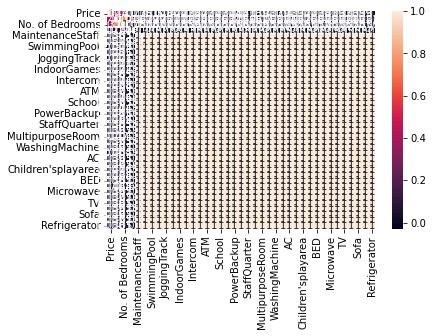

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
X = data[['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']]

y = data['Price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [12]:
X_train

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
3450,3500000,1465,Manapakkam,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3853,4255000,1038,Ayanambakkam,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4676,22300000,1685,Padur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4033,12600000,612,Moolacheri,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
233,8205000,1563,Karapakkam,3,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,4829000,876,Selaiyur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2896,3474000,738,Nanmangalam,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
691,9741000,1584,Perungudi,3,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3336,10500000,850,Porur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


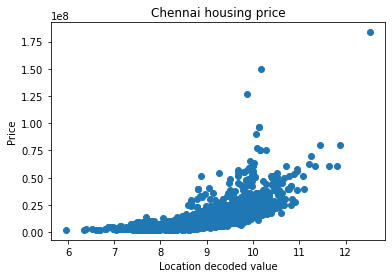

In [13]:
K=np.log(X_train['Price']/X_train['Area'])

plt.plot(K,X_train['Price'],'o')
plt.xlabel('Location decoded value')
plt.ylabel('Price')
plt.title('Chennai housing price')
plt.show()


In [14]:
matrix_corr=X_train.corr()
matrix_corr['Price']

Price                  1.000000
Area                   0.419317
No. of Bedrooms        0.303560
Resale                 0.091496
MaintenanceStaff       0.052747
Gymnasium              0.063763
SwimmingPool           0.063166
LandscapedGardens      0.060994
JoggingTrack           0.054873
RainWaterHarvesting    0.055554
IndoorGames            0.056832
ShoppingMall           0.052591
Intercom               0.060870
SportsFacility         0.056424
ATM                    0.051148
ClubHouse              0.060837
School                 0.051561
24X7Security           0.057899
PowerBackup            0.061380
CarParking             0.055960
StaffQuarter           0.052703
Cafeteria              0.053710
MultipurposeRoom       0.054613
Hospital               0.051831
WashingMachine         0.053339
Gasconnection          0.054344
AC                     0.053011
Wifi                   0.051422
Children'splayarea     0.060690
LiftAvailable          0.056109
BED                    0.052695
VaastuCo

In [15]:
def na_remove(data):
    data.replace(9,0.5,inplace=True)

In [16]:
def data_processing(data):
    K=np.log(data['Price']/data['Area'])
    data['Location']=K
    house_feature=data.drop(['Price'],axis=1)
    my_pipeline=Pipeline([('rem',na_remove(house_feature)),
                          ('std',StandardScaler())   
                         ])
    return my_pipeline.fit_transform(house_feature)

In [17]:
houseprice_train=np.log(X_train['Price'])
data_train=data_processing(X_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data_train.shape

(4011, 39)

# Different model training

In [19]:
model1=LinearRegression().fit(data_train,houseprice_train)

In [20]:
model2=Ridge().fit(data_train,houseprice_train)

In [21]:
model3=DecisionTreeRegressor().fit(data_train,houseprice_train)

In [22]:
model4=RandomForestRegressor().fit(data_train,houseprice_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
model1_pred=model1.predict(data_train)
model2_pred=model2.predict(data_train)
model3_pred=model3.predict(data_train)
model4_pred=model4.predict(data_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

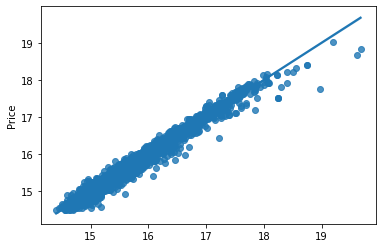

In [24]:
sns.regplot(model1_pred,houseprice_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

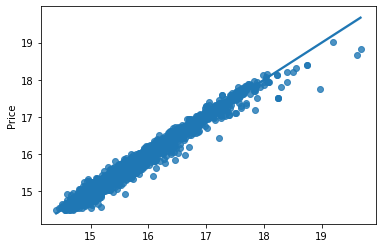

In [25]:
sns.regplot(model2_pred,houseprice_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

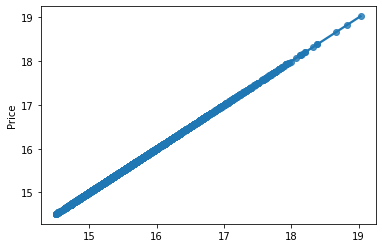

In [26]:
sns.regplot(model3_pred,houseprice_train)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

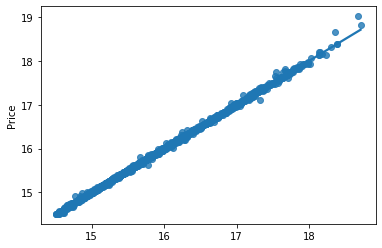

In [27]:
sns.regplot(model4_pred,houseprice_train)

# Testing

In [28]:
houseprice_test=X_test['Price']

In [29]:
data_test=data_processing(X_test)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
model1_test=np.exp(model1.predict(data_test))
model2_test=np.exp(model2.predict(data_test))
model3_test=np.exp(model3.predict(data_test))
model4_test=np.exp(model4.predict(data_test))

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

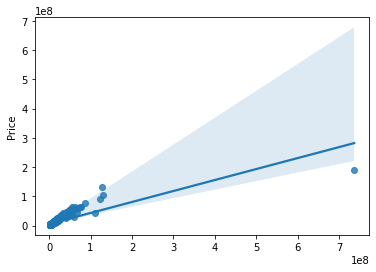

In [31]:
sns.regplot(model1_test,houseprice_test)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

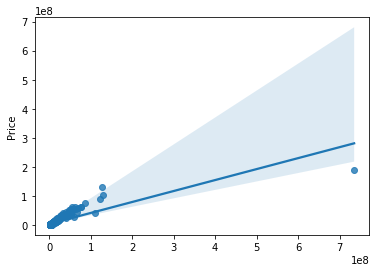

In [32]:
sns.regplot(model2_test,houseprice_test)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

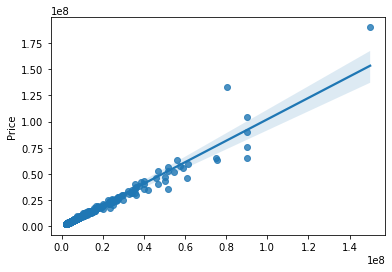

In [33]:
sns.regplot(model3_test,houseprice_test)

C:\Users\retec\Anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Price'>

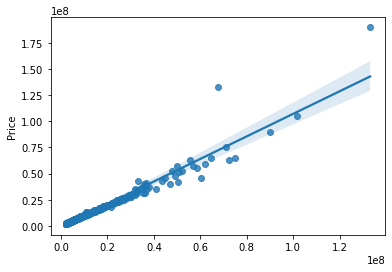

In [34]:
sns.regplot(model4_test,houseprice_test)

In [35]:
model1_r2=r2_score(model1_test,houseprice_test)

model2_r2=r2_score(model2_test,houseprice_test)

model3_r2=r2_score(model3_test,houseprice_test)

model4_r2=r2_score(model4_test,houseprice_test)

In [36]:
print("model1_error:{}\nmodel2_error:{}\nmodel3_error:{}\nmodel4_error:{}".format(model1_r2,model2_r2,model3_r2,model4_r2))

model1_error:0.538825956024066
model2_error:0.5394073065736597
model3_error:0.9474196306447211
model4_error:0.9271038597655583


# Model exporting

In [37]:
import joblib as jb

In [38]:
jb.dump(model4,'Chennai_house_price.pkl')

['Chennai_house_price.pkl']